# Grupo: Douglas Ferreira e Luiz Souza

# Particle swarm optimization para função Rastrigin

O método Particle Swarm Optimization consiste em um método de otimização dentro da computação evolucionária que tem como objetivo obter soluções ideais, estabelecidas pelo programador, a partir de outras, geradas aleatoriamente. O PSO foi proposto por Eberhart e Kennedy em 1995, e tem sido amplamente utilizado desde então, uma vez que gera resultados impressionantes para o nível de simplicidade de implementação. O algoritmo foi baseado na migração de pássaros da natureza, com várias párticulas (soluções) procurando pela solução ótima. Tal método não entrega, no entanto, certeza de que a solução ótima será encontrada.

Para testar tal capcidade, nesse programa, foram utilizadas as funções Peaks e Rastrigin, que possuem a capacidade de avaliar a efetividade desse tipo de algoritmo.

A função Peaks é definida pela seguitne equação:
$3(1-x)^2e^{-x^2} -(y+1)^2 - 10(\frac{x}{5} -x^3 -y^5)e^{-x^2-y^2} - \frac{e^{{-(x+1)}^2}-y^2}{3}$

Enquanto a função Rastrigin é definida por: $f(x) = \sum_{i=1}^{n} [f(x) + x_i^2 - 10cos(2 \pi x_i)]$

O algoritmo elaborado usou, como parâmetros: velocidade máxima igual a 1, fatores de Aprendizagem C1 e C2 igual a 1 e 1, tamanho da população avaliada igual a 100 e W igual a 0,5.

Tem-se, a partir desses parâmetros, as seguintes definições utilizadas no programa:

Posição da partícula: $x_{k+1}^{i} = x_k^i + v_{k+1}^{i}$

Velocidade da partícula: $v_{k+1}^{i}=w_kv_k^i+c_1r_1  (p_{k}^{i} - x_k^i) + c_2r_2  (p_k^g - x_k^i)$

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import math
from scipy import stats

# Definição dos parâmetros

In [2]:
Vmax = 1.0
W =0.5
C1 =1.0
C2 =1.0
N = 100 #Tamanho da populacao

# Uma população de partículas é criada. Essa população é composta por: posições, velocidades, melhores posições e melhores valores de função objetivo para cada uma das partículas. Essa população também possui a melhor posição geral entre as partículas e o melhor valor de função geral referente à essa posição.

In [3]:
def Population(intervalo):
    posicoes = np.random.uniform(intervalo[0],intervalo[1],(N,2))#São geradas as N posicoes para as N partículas
    velocidade = np.random.uniform(-Vmax,Vmax,(N,2)) #São geradas as N velocidades das N partículas
    ValorFuncao = []#Lista que vai armazenar os valores de funcao objetivo de cada partícula
    
    #No loop são calculados os valores de funcao objetivo para cada partícula
    for i in range(len(posicoes)):
        ValorFuncao.append(Rastrigin(posicoes[i]))
        
    MelhorF = min(ValorFuncao)#Menor e melhor valor de funcao objetivo da lista de todos os valores de funcao objetivo das N particulas
    min_index = ValorFuncao.index(MelhorF)#O indice do melhor valor de funcao objetivo é extraido
    MelhorPosicao = posicoes[min_index]# Utilizando o indice extraido, a melhor posicao relativa a esse indice é determinada
    posicoes_individuais = np.random.rand(N,2)# Lista inicial para as melhores posições das N partículas
    valor_func_individuais =  [  Rastrigin(i) for i in posicoes_individuais ];# Lista inicial para os N melhores  valores de f(x) das partículas
    #Essa lista de listas que vai ser retornada possuirá:  posicoes iniciais de N partículas na primeira lista, velocidades iniciais
    # de N particulas na segunda lista,a melhor posicao geral na terceira lista, o melhor valor de funcao objetivo na quarta
    #lista, as listas 5  e 6 são listas de dimensões (N,2) que serão preenchidas com zeros
    # e servirao para armazenar a melhor posicao de cada particula em uma dada iteracao e  o melhor valor de funcao objetivo 
    # na mesma iteracao.
    populacao = [posicoes, velocidade, MelhorPosicao, MelhorF,posicoes_individuais,valor_func_individuais]
    return populacao# A populacao  de particulas é retornada

In [4]:
def Rastrigin(x):
    saida = (x[0]**2-10*np.cos(2*math.pi*x[0])) + (x[1]**2 -10*np.cos(2*math.pi*x[1]))
    return saida

# Função que atualiza a posição de uma dada partícula

In [5]:
def atualiza_posicao(PosicaoAtual, Velocidade):
    NovaPosicao = PosicaoAtual+Velocidade
    return NovaPosicao
    

# Função que atualiza a velocidade de uma dada partícula

In [6]:
def calcula_velocidade(PosicaoAtual,VelAtual,MelhorPosiIndi,MelhorPosiGeral):
    R1, R2 = np.random.uniform(0,1,2) 
    ProxVeloc = W*VelAtual+C1*R1*(MelhorPosiIndi-PosicaoAtual)+C2*R2*(MelhorPosiGeral - PosicaoAtual)
    for i  in range(2):
        if(ProxVeloc[i]>Vmax):
            ProxVeloc[i] =  Vmax - (ProxVeloc[i] % Vmax) 
        elif(ProxVeloc[i]< -Vmax):
            ProxVeloc[i] =  -Vmax - (ProxVeloc[i] % -Vmax) 

    return ProxVeloc

In [7]:
def plotar(valores_fitness, medias):
   # iteracoes = range(len(valores_fitness)) 
    fig, ax = plt.subplots( dpi=120 )
    ax.plot(valores_fitness,"#877009", label=' menor valor da função objetivo em cada Geração')
    #ax.plot(iteracoes, valores_fitness, label=' Mínimo em cada Geração')
    ax.plot(medias, "#9902FA", label=' média do valor da função objetivo em cada Geração')
    #ax.set_xlabel('Gerações')
    ax.set_ylabel('Valor da função objetivo')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #plt.title('\nNº de fitness em cada geração.') 
    plt.show()

In [8]:
def otimizaPso(populacao):
    for i in range(N):
        valorfuncao = Rastrigin(populacao[0][i])
        if(valorfuncao<populacao[5][i]):#Se o valor de f(x) calculado agora é melhor que o melhor valor de f(x) de uma partícula, então: ...
            populacao[5][i] = valorfuncao#O novo melhor valor de f(x) dessa partícula é atualizado...
            populacao[4][i] = populacao[0][i]# Assim como sua nova melhor posição é atualizada
        if(valorfuncao<populacao[3]):#Se o valor de f(x) de uma dada partícula é melhor do que o último melhor valor geral de f(x)...
            populacao[3] = valorfuncao #Então substitua o último valor por esse recentemente calculado...
            populacao[2] = populacao[0][i]#E susbtitua a última melhor posição geral por essa nova.
        nova_velocidade = calcula_velocidade(populacao[0][i],populacao[1][i],populacao[4][i],populacao[2]) #Calcula a nova velocidade da partícula
        populacao[1][i] = nova_velocidade# Atualiza o novo valor de velocidade da partícula
        nova_posicao =  atualiza_posicao(populacao[0][i], populacao[1][i])# Calcula a nova posicao da particula
        populacao[0][i] = nova_posicao #Atualiza o valor de posição da partícula
    return populacao
        

Ponto de mínimo: [3.37021283e-09 3.40951689e-10]
Valor de mínimo: -20.0


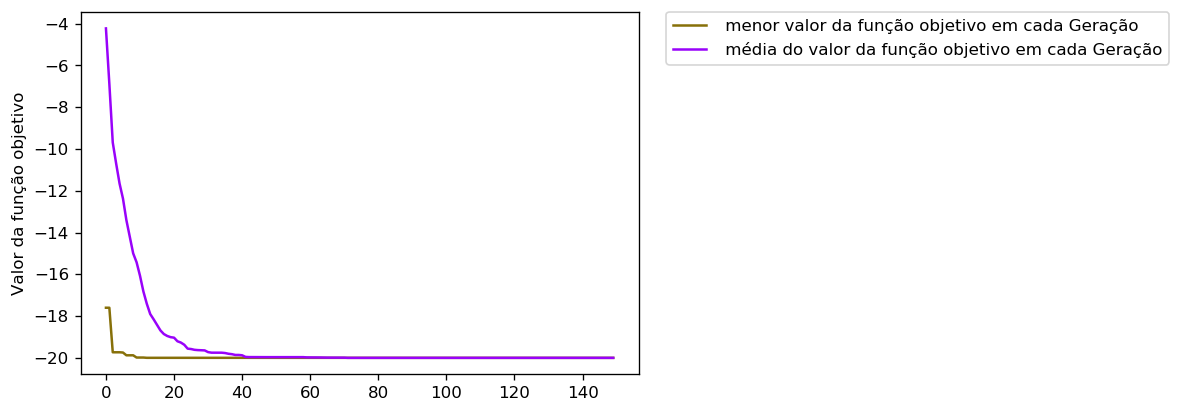

In [9]:
def main():
    populacao = Population([-3,3])
    valoresfx = []
    media = []
    for i in range(150):
        populacao = otimizaPso(populacao)
        valoresfx.append(populacao[3])
        media.append(np.mean(populacao[5]))
   
    print("Ponto de mínimo:", populacao[2])
    print("Valor de mínimo:", populacao[3])
    plotar(valoresfx, media)
if __name__ == "__main__":
    main()
